In [1]:
from PIL import Image
from numpy import asarray
from os import listdir
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
images = []
labels = []
size = 100

In [3]:
for file in listdir('face_mask'):
    image  = Image.open('face_mask/'+file)
    image = image.convert('L')
    resized_image = image.resize((size,size))
    data = asarray(resized_image)
    if data.shape == (size,size):
        images.append(data)
        labels.append(1)
    

In [4]:
for file in listdir('face'):
    image  = Image.open('face/'+file)
    image = image.convert('L')
    resized_image = image.resize((size,size))
    data = asarray(resized_image)
    if data.shape == (size,size):
        images.append(data)
        labels.append(0)

/home/fara/anaconda3/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
len(images)

1955

In [6]:
x = np.array(images)
y = np.array(labels)

In [7]:
print('x.shape: ',x.shape)
print('y.shape: ',y.shape)

x.shape:  (1955, 200, 200)
y.shape:  (1955,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

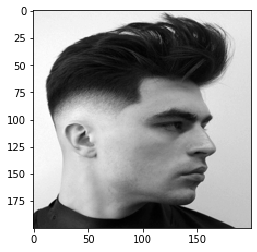

In [9]:
from matplotlib import pyplot
pyplot.imshow(X_train[111], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [10]:
y_train[111]

0

In [11]:
X_train = X_train.reshape((X_train.shape[0],size,size,1)).astype('float32')/255
X_test = X_test.reshape((X_test.shape[0],size,size,1)).astype('float32')/255

In [12]:
from keras.utils import np_utils

print(X_train.shape)

ytrain = np_utils.to_categorical(y_train)
ytest = np_utils.to_categorical(y_test)
print(ytrain.shape)

(1309, 200, 200, 1)
(1309, 2)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import optimizers
net = Sequential()

In [14]:
net.add(Conv2D(200, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(size,size,1)))
net.add(MaxPooling2D(3, 3))
# net.add(Dropout(0.25))
# net.add(Conv2D(100, (33, 66), padding='same',activation='relu', kernel_initializer='he_uniform', input_shape=(size,size,3)))
net.add(Conv2D(100, (3, 3), activation='relu'))
net.add(MaxPooling2D((3, 3)))
##
# net.add(Conv2D(16, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=(size,size,3)))
# net.add(MaxPooling2D((2, 2)))
##
net.add(Flatten())
net.add(Dense(64,  activation='relu', kernel_initializer='he_uniform' ))
# net.add(Dense(100, activation='relu'))
net.add(Dense(2, activation='softmax'))

In [15]:
import keras.metrics
net.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [16]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 200)     2000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 44100)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2822464   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [ ]:
net.fit(X_train, ytrain, epochs= 15, batch_size = 100)

Epoch 1/15


In [ ]:
net.evaluate(X_test, ytest)